# Econometria Aplicada

## Aula 7 - Modelos ARIMA

João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

**Motivação**: \\

 Qual será o crescimento trimestral do PIB nos próximos quatro trimestres?

### Pacotes

In [ ]:
install.packages("ipeadatar")  # para obter os dados do SGS do Banco Central do Brasil
install.packages("ggplot2")    # gráficos em geral
install.packages("urca")       # para os testes de raiz unitária
install.packages("fpp3")       # para gerar as previsões

In [ ]:
library(ipeadatar)
library(ggplot2)
library(urca)
library(fpp3)

## Visualização dos dados

### PIB

Procure as séries que contêm a expressão "PIB" no campo "name":

In [ ]:
search <- search_series( terms = c('PIB'), fields = c('name'), language = "br" )
search_tri <- subset( search, freq == "Trimestral" & source == "IBGE/SCN Trim.") # Filtrar séries com frequência trimestral e cuja fonte seja o Sistema de Contas Nacionais do IBGE (SCN)

In [ ]:
search_tri

Faça o download da série da variação do PIB frente ao trimestre do ano anterior:

In [ ]:
pib = ipeadata("PAN4_PIBPMG4") # variação do PIB frente ao trimestre do ano anterior.

Veja os primeiros 5 elementos do objeto 'pib':

In [ ]:
pib = ts( pib$value, start = c( 1997, 1 ), frequency = 4 )

Cire um data frame chamado 'dat' que tenha duas variáveis: o 'pib' e uma variável com o trimestre. Para isso, utilize a função 'time( objeto )', onde 'objeto é a série temporal cujo tempo você quer extrair. No nosso caso, será a varíavel 'pib':

Veja os primeiros 5 elementos do objeto 'dat':

Faça um gráfico com a evolução do crescimento do PIB real ao longo do tempo:

## Funções de autocorrelação

In [ ]:
install.packages("stats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


In [ ]:
library(stats)

Faça um gráfico com a função de autocorrelação do crescimento real trimestral do PIB:

Faça um gráfico com a função de autocorrelação parcial do crescimento real trimestral do PIB:

## Testes de raiz unitária

### ADF (Augmented-Dickey-Fuller)

$H_0$: possui raiz unitária

### KPSS

$H_0$: não possui raiz unitária

## Estimando modelos AR, MA e ARIMA

Estime um modelo AR(1):

In [ ]:
ar1 = pib %>% as_tsibble() %>% model( ARIMA( pib ~ pdq(1,0,0) ) )
report( ar1 )

Series: pib 
Model: ARIMA(1,0,0)(0,0,1)[4] w/ mean 

Coefficients:
         ar1     sma1  constant
      0.9273  -0.7353    0.1657
s.e.  0.0391   0.0754    0.0491

sigma^2 estimated as 3.836:  log likelihood=-219.81
AIC=447.61   AICc=448.01   BIC=458.23


Estime um modelo AR(2):

Estime um modelo MA(1):

Estime um modelo MA(2):

Estime um modelo ARIMA(1,0,1):

Estime um modelo ARIMA(2,0,2):

#### Projeções

Estime um modelo AR(1) e faça a projeção para os próximos quatro trimestres:

In [ ]:
ar = pib %>% as_tsibble() %>% model( ARIMA( pib ~ pdq(1,0,0) ) ) %>% forecast(h = 4)

Crie um data frame que contenha (i) os dados observados do PIB junto aos dados projetados e (ii) uma série de datas:

In [ ]:
data = data.frame( pib = ts( c( pib,  ar$.mean ) ),
                   dates = seq(as.Date('1997-03-01'), as.Date('2024-03-01'), by='quarter') )

Crie um objeto para que no gráfico a área hachurada represente o período de projeções:

In [ ]:
forecast = read.table(textConnection(
  "Beg, End
2023-6-01, 2024-03-01"), sep=',',
  colClasses=c('Date', 'Date'), header=TRUE)

Faça um gráfico com as projeções do modelo AR(1) para o PIB:

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


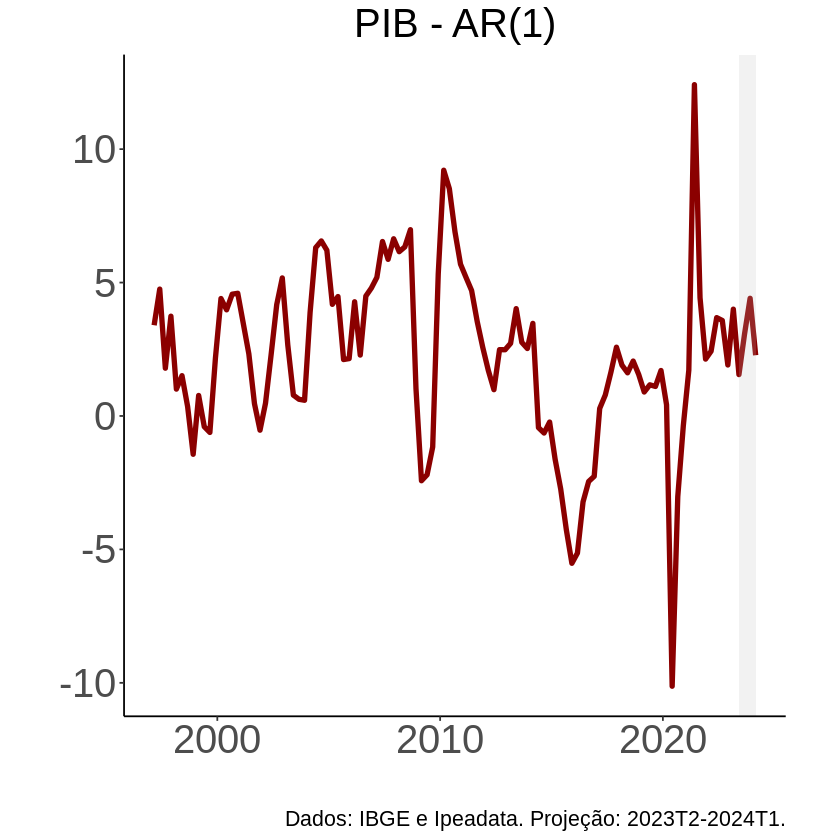

In [ ]:
ggplot( data ) + geom_line(aes(x = dates, y =  pib ), size = 1.5, colour = "darkred") +
  theme_classic() +
  geom_rect(data=forecast, aes(xmin=Beg,
                                 xmax=End, ymin=-Inf, ymax=+Inf), fill='gray', alpha=0.2) +
  labs(x = "", y="") +
  theme(aspect.ratio=1) +
  ggtitle( "PIB - AR(1)" ) +
  theme(plot.title = element_text( size = 24, hjust = 0.5) ) +
  theme(axis.text = element_text(size = 24) ) +
  theme(axis.title.y = element_text(size = 24, angle = 360, vjust = 0.5, hjust=1)) +
  theme(axis.title.x = element_text(size = 24, vjust = 0.5, hjust=1)) +
  theme(text = element_text(size= 16) ) +
  labs( caption = "Dados: IBGE e Ipeadata. Projeção: 2023T2-2024T1.")

Estime um modelo MA(2) e faça a projeção para os próximos quatro trimestres:

Crie um data frame que contenha (i) os dados observados do PIB junto aos dados projetados e (ii) uma série de datas:

Faça um gráfico com as projeções do modelo MA(2) para o PIB:

## Projeções com o modelo ARIMA

Estime um modelo ARIMA cuja ordem será escolhida automaticamente:

In [ ]:
arima = pib %>% as_tsibble() %>% model( ARIMA( pib ) )

report( arima )

Faça a projeção para os próximos quatro trimestres:

In [ ]:
arima = arima %>% forecast(h = 4)

Crie um data frame que contenha (i) os dados observados do PIB junto aos dados projetados e (ii) uma série de datas:

Faça um gráfico com as projeções do modelo ARIMA para o PIB:

### Resíduos ARIMA

Analise os resíduos do modelo ARIMA:

In [ ]:
pib %>% as_tsibble() %>%  model( ARIMA( pib ) )  %>%
  gg_tsresiduals()